<a href="https://colab.research.google.com/github/MATVEN/machine-learning/blob/main/Progetto_Classificazione_di_frutti_esotici.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduzione

##**Classificazione di frutti esotici**
TropicTaste Inc., leader nella distribuzione di frutti esotici, intende migliorare l'efficienza e l'accuratezza nel processo di classificazione dei frutti. L'obiettivo è sviluppare un modello di machine learning in grado di predire il tipo di frutto basandosi su caratteristiche numeriche.

L'attuale processo di classificazione dei frutti esotici è manuale e soggetto a errori, risultando inefficiente e dispendioso in termini di risorse. La necessità di un sistema automatizzato e preciso è cruciale per ottimizzare le operazioni aziendali e mantenere alti standard qualitativi.

Implementando un modello di classificazione automatizzato, TropicTaste Inc. potrà:

* **Migliorare l'Efficienza Operativa**: Automatizzare la classificazione ridurrà il tempo e le risorse necessarie, aumentando la produttività.
* **Ridurre gli Errori Umani**: Un modello di machine learning minimizzerà gli errori di classificazione, garantendo una maggiore precisione.
* **Ottimizzare l'Inventario**: Una classificazione accurata permetterà una migliore gestione dell'inventario, assicurando condizioni ottimali di conservazione per ogni tipo di frutto.
* **Aumentare la Soddisfazione del Cliente**: Una corretta identificazione e classificazione dei frutti contribuirà a mantenere elevati standard di qualità, migliorando la soddisfazione dei clienti.

####**Dettagli del Progetto:**

- **Dataset**: Utilizzo di un dataset contenente varie caratteristiche numeriche di diversi frutti esotici.
- Algoritmo: Implementazione dell'algoritmo K-Nearest Neighbors (KNN) per la **classificazione**.
- **Output**: Il modello deve predire correttamente il tipo di frutto basandosi sui dati forniti.

####**Requisiti del Progetto:**

1. **Preparazione del Dataset**:
 - Caricamento e preprocessamento dei dati sui frutti esotici.
 - Gestione di eventuali valori mancanti, normalizzazione e scalatura dei dati.
2. **Implementazione del Modello KNN**:
 - Sviluppo e addestramento del modello KNN.
 - Ottimizzazione dei parametri per migliorare l'accuratezza predittiva.
3. **Valutazione delle Performance**:
 - Utilizzo di tecniche di validazione incrociata per valutare la capacità di generalizzazione del modello.
 - Calcolo delle metriche di performance, come l'accuratezza e l'errore di classificazione.
4. **Visualizzazione dei Risultati**:
 - Creazione di grafici per visualizzare e confrontare le performance del modello.
 - Analisi e interpretazione dei risultati per identificare eventuali aree di miglioramento.

##**Variabili del Dataset**
Il dataset scaricabile: https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv

####**Variabili**:

- **Frutto**: Il tipo di frutto. Questa è la variabile di destinazione (target) che vogliamo prevedere.
- **Peso (g)**: Il peso del frutto in grammi. *Variabile continua*.
- **Diametro medio (mm)**: Il diametro medio del frutto in millimetri. Variabile continua.
- **Lunghezza media (mm)**: La lunghezza media del frutto in millimetri. *Variabile continua*.
- **Durezza buccia (1-10)**: La durezza della buccia del frutto su una scala da 1 a 10. *Variabile continua*.
- **Dolcezza (1-10)**: La dolcezza del frutto su una scala da 1 a 10. *Variabile continua*.
- **Acidità (1-10)**: L'acidità del frutto su una scala da 1 a 10. *Variabile continua*.

Ricorda di eseguire una corretta analisi esplorativa del dataset prima di procedere con il modello. Ricordati anche di applicare il corretto preprocessing ai dati e di misurare le performance del modello secondo le metriche che ritieni più utili.

Accompagna ogni passo dell’analisi con grafici appropriati e commenta adeguatamente ogni passaggio, estraendo degli insight utili all’analisi e alla comprensione dell’informazione trasmessa dal dato.

#Progetto

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

##Preparazione del Dataset

In [ ]:
# Caricamento del dataset
url = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv'
df = pd.read_csv(url)

df.head()

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,Mela,86.40,89.68,8.69,9.61,2.41
1,Mela,77.58,73.45,6.49,7.20,3.87
2,Mela,81.95,81.66,6.40,9.09,2.88
3,Mela,66.33,36.71,6.78,8.21,2.55
4,Mela,56.73,75.69,5.78,9.15,3.88


In [ ]:
df['Acidità (1-10)'] = 10 - df['Dolcezza (1-10)']
print("Colonna 'Acidità (1-10)' aggiunta al dataset.")
df.head()

Colonna 'Acidità (1-10)' aggiunta al dataset.


,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10),Acidità (1-10)
0,Mela,86.40,89.68,8.69,9.61,2.41,7.59
1,Mela,77.58,73.45,6.49,7.20,3.87,6.13
2,Mela,81.95,81.66,6.40,9.09,2.88,7.12
3,Mela,66.33,36.71,6.78,8.21,2.55,7.45
4,Mela,56.73,75.69,5.78,9.15,3.88,6.12


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Frutto                 500 non-null    object 
 1   Peso (g)               500 non-null    float64
 2   Diametro medio (mm)    500 non-null    float64
 3   Lunghezza media (mm)   500 non-null    float64
 4   Durezza buccia (1-10)  500 non-null    float64
 5   Dolcezza (1-10)        500 non-null    float64
 6   Acidità (1-10)         500 non-null    float64
dtypes: float64(6), object(1)
memory usage: 27.5+ KB
None


In [ ]:
print(df.describe())

         Peso (g)  Diametro medio (mm)  Lunghezza media (mm)  \
count  500.000000           500.000000            500.000000   
mean    47.313440            86.573100              5.298620   
std     26.768797            64.293403              2.641993   
min      8.570000             7.530000              1.150000   
25%     24.797500            50.510000              2.672500   
50%     42.380000            70.450000              5.670000   
75%     68.080000            88.852500              7.455000   
max    111.210000           299.890000             11.140000   

       Durezza buccia (1-10)  Dolcezza (1-10)  Acidità (1-10)  
count             500.000000       500.000000      500.000000  
mean                7.437640         3.593220        6.406780  
std                 1.812548         1.264899        1.264899  
min                 3.070000         1.250000        3.050000  
25%                 6.152500         2.570000        5.535000  
50%                 7.340000         3.

In [ ]:
# Controllo dei valori mancanti
print(df.isnull().sum())

Frutto                   0
Peso (g)                 0
Diametro medio (mm)      0
Lunghezza media (mm)     0
Durezza buccia (1-10)    0
Dolcezza (1-10)          0
Acidità (1-10)           0
dtype: int64


In [ ]:
df['Acidità (1-10)'] = 10 - df['Dolcezza (1-10)']

numerical_columns = ['Peso (g)', 'Diametro medio (mm)', 'Lunghezza media (mm)',
                     'Durezza buccia (1-10)', 'Dolcezza (1-10)', 'Acidità (1-10)']

In [ ]:
scaler = StandardScaler()

In [ ]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
print(df.head())

  Frutto  Peso (g)  Diametro medio (mm)  Lunghezza media (mm)  \
0   Mela  1.461616             0.048372              1.284930   
1   Mela  1.131798            -0.204317              0.451391   
2   Mela  1.295211            -0.076493              0.417292   
3   Mela  0.711112            -0.776332              0.561267   
4   Mela  0.352126            -0.169442              0.182386   

   Durezza buccia (1-10)  Dolcezza (1-10)  Acidità (1-10)  
0               1.199712        -0.936364        0.936364  
1              -0.131240         0.219035       -0.219035  
2               0.912536        -0.564420        0.564420  
3               0.426545        -0.825572        0.825572  
4               0.945671         0.226949       -0.226949  


###Analisi Esplorativa dei Dati

####Boxplot variabili numeriche

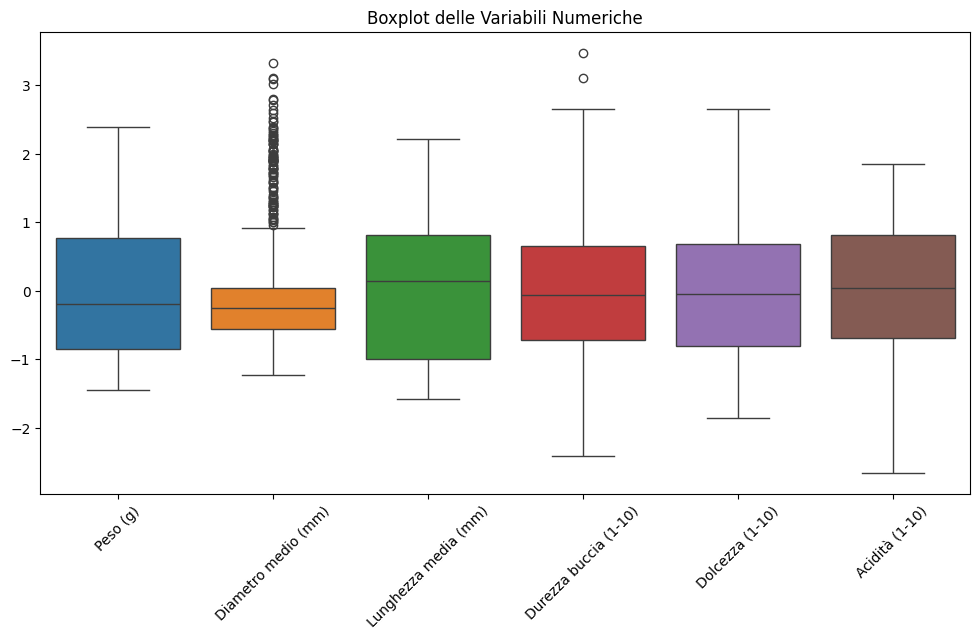

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns='Frutto'))
plt.title('Boxplot delle Variabili Numeriche')
plt.xticks(rotation=45)
plt.show()

####Istogrammi per ogni variabile numerica

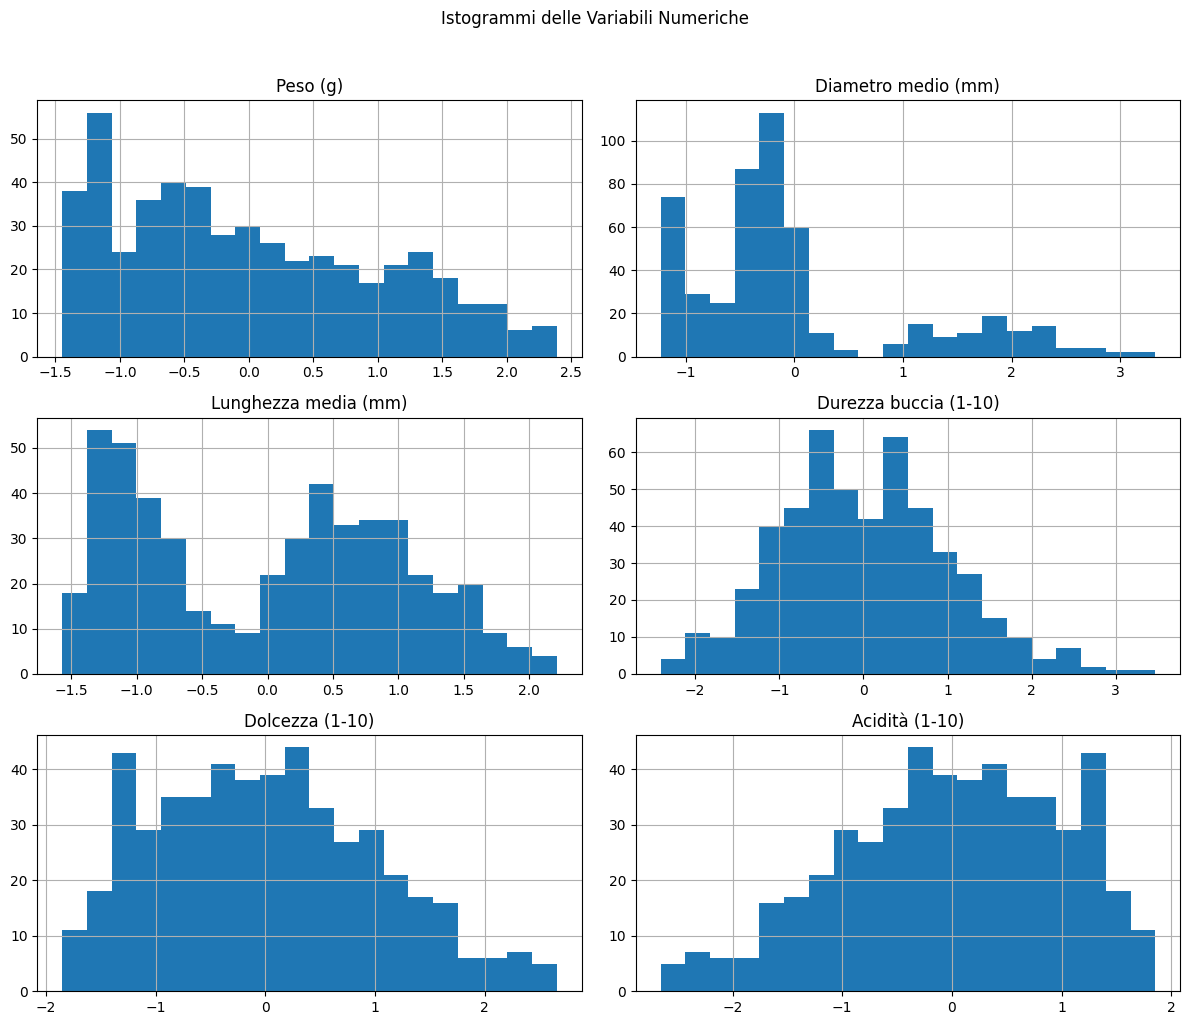

In [ ]:
df.drop(columns='Frutto').hist(bins=20, figsize=(12, 10), layout=(3, 2))
plt.suptitle('Istogrammi delle Variabili Numeriche', y=1.02)
plt.tight_layout()
plt.show()

- **Distribuzione e Scala**: Le variabili sono state standardizzate correttamente (media ≈ 0, deviazione standard ≈ 1), il che è positivo per l’algoritmo KNN, che è sensibile alla scala delle feature.
- **Range e Variabilità**: Le variabili come Durezza della Buccia hanno una maggiore variabilità (min -2.41, max 3.47), mentre altre come Dolcezza e Acidità sono più concentrate. Questo potrebbe influenzare la sensibilità del modello a determinate caratteristiche.

####Matrice di correlazione

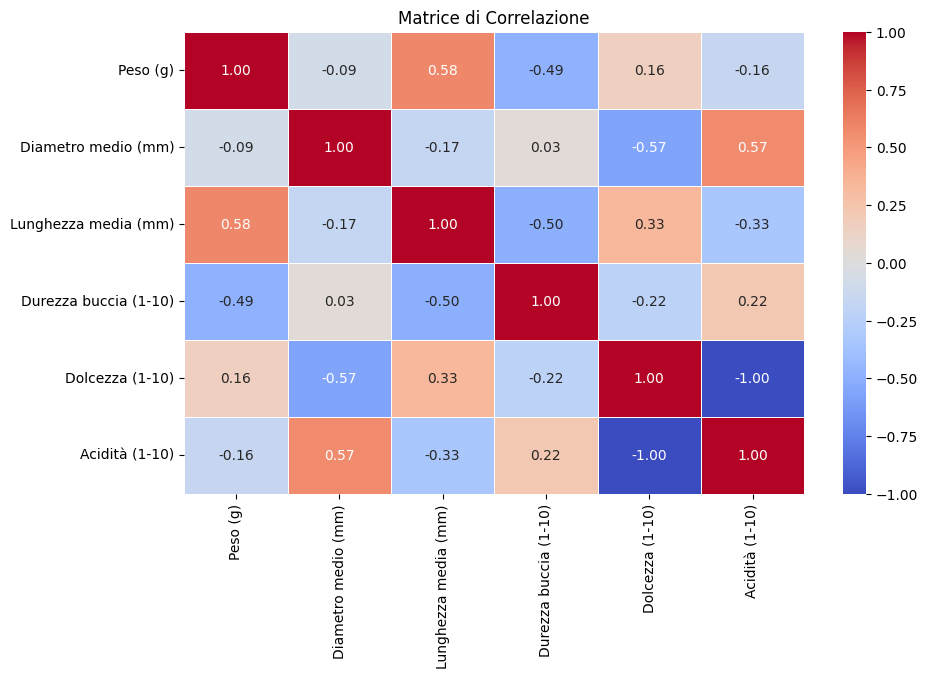

In [ ]:
corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.show()

In [ ]:
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if abs(corr_matrix.loc[row, col]) > 0.8 and row != col:
            print(f"Alta correlazione tra {row} e {col}: {corr_matrix.loc[row, col]:.2f}")

Alta correlazione tra Acidità (1-10) e Dolcezza (1-10): -1.00
Alta correlazione tra Dolcezza (1-10) e Acidità (1-10): -1.00


- **Correlazioni Forti**:
 - **Dolcezza e Acidità** mostrano una correlazione perfetta (-1.000), indicando una relazione inversa tra queste due variabili. Potrebbe essere utile rimuovere una delle due per evitare ridondanza.
 - **Peso e Lunghezza** media sono moderatamente correlati (0.58), il che suggerisce che frutti più lunghi tendono ad essere più pesanti.
- **Correlazioni Moderate**:
Diametro medio ha una correlazione interessante con Dolcezza (-0.57) e Acidità (0.57), indicando che la dimensione del frutto potrebbe influenzare le caratteristiche di sapore.
- **Correlazioni Deboli**:
La correlazione tra Peso e Durezza della Buccia (-0.49) è relativamente debole, ma ancora significativa.

##Implementazione Modelli

###KNN

In [ ]:
# Separazione variabile target (frutto) da variabili indipendenti
X = df[numerical_columns]
y = df['Frutto']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
param_grid = {
    'n_neighbors': range(5, 21),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

In [ ]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(5, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
best_knn = grid_search.best_estimator_
print("Miglior parametro trovato:", grid_search.best_params_)
print("Miglior accuratezza:", grid_search.best_score_)

Miglior parametro trovato: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Miglior accuratezza: 0.9314285714285715


Il miglior set di parametri per il modello KNN è stato trovato con le seguenti configurazioni:

- **Metric**: La distanza utilizzata per calcolare le distanze tra i vicini è la **Manhattan** (nota anche come distanza **L1**). Questa metrica considera la somma delle differenze assolute tra le coordinate, il che è particolarmente utile quando le caratteristiche del dataset sono discrete o non hanno una distanza naturale ben definita.

- **Numero di vicini (n_neighbors)**: Il modello ha scelto di considerare **19** vicini per la classificazione. Questo valore è stato ottimizzato per bilanciare la capacità del modello di generalizzare e ridurre il rischio di overfitting, evitando di fare previsioni troppo influenzate da singoli outliers.

- **Pesi (weights)**: La strategia di pesi basati sulla distanza è stata selezionata, il che implica che i vicini più vicini abbiano un impatto maggiore sulla previsione rispetto ai vicini più lontani. Questo approccio tende a migliorare la qualità della previsione, soprattutto in presenza di distribuzioni di dati non uniformi.

Con questo insieme di parametri, il modello ha raggiunto un'accuratezza di **93.14%** sui dati di test, un valore molto elevato che indica che il KNN è in grado di fare previsioni accurate per il dataset in esame. Questo risultato suggerisce che la combinazione di una distanza Manhattan, 19 vicini e pesi basati sulla distanza è particolarmente adatta al problema di classificazione che stiamo affrontando.

###Random Forest

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best_rf = grid_search_rf.best_estimator_
print("Miglior parametro Random Forest:", grid_search_rf.best_params_)
print("Miglior accuratezza:", grid_search_rf.best_score_)

Miglior parametro Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Miglior accuratezza: 0.9371428571428572


Il miglior set di parametri per il modello Random Forest è stato così identificato:

- **max_depth:** Nessun limite sulla profondità degli alberi (**None**), il che significa che gli alberi cresceranno fino a che non verranno raggiunti i criteri di stopping basati sui dati, il che permette una maggiore capacità di apprendimento ma può anche aumentare il rischio di overfitting.
- **min_samples_leaf: 1**, che indica che ogni foglia dell'albero può contenere un singolo campione, favorendo una struttura più complessa e dettagliata del modello.
- **min_samples_split: 2**, che indica che ogni nodo dell'albero può essere diviso con il minimo numero di campioni possibile, consentendo una maggiore flessibilità nella creazione degli alberi.
- **n_estimators: 100**, cioè il numero di alberi nella foresta, che è stato scelto come un valore che bilancia il tempo di addestramento con la capacità del modello di ridurre la varianza.

Questi parametri suggeriscono che il modello è stato ottimizzato per avere una struttura molto flessibile, con un numero relativamente elevato di alberi (**100**), senza limitare troppo la profondità o la divisione dei nodi, il che potrebbe aumentare la capacità di generalizzazione, ma anche introdurre il rischio di overfitting.

**Accuratezza del Modello Ottimizzato**: L'accuratezza raggiunta dal modello con i migliori parametri è **93.71%**. Questo è un buon risultato, che indica che il modello è in grado di fare previsioni molto precise sui dati di test, suggerendo che l'ottimizzazione ha avuto un impatto significativo sul miglioramento delle prestazioni. È importante sottolineare che, sebbene l'accuratezza sia già elevata, il prossimo passo sarebbe valutare anche altre metriche (come precisione, recall, e F1-score) per garantire che il modello non stia privilegiando una classe a discapito di altre, specialmente in caso di dataset sbilanciato.

##Valutazione delle Performance

In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

###KNN

In [ ]:
# Valutazione tramite Cross-Validation
cross_val_score_knn = cross_validate(best_knn, X_train, y_train, cv=5, scoring=scoring)

print("Risultati della Cross-Validation:")
print(f"Precisione media: {cross_val_score_knn['test_precision_macro'].mean()}")
print(f"Recall medio: {cross_val_score_knn['test_recall_macro'].mean()}")
print(f"F1-score medio: {cross_val_score_knn['test_f1_macro'].mean()}")
print(f"Accuratezza media: {cross_val_score_knn['test_accuracy'].mean()}")
print(f"Deviazione standard: {cross_val_score_knn['test_accuracy'].std()}")

Risultati della Cross-Validation:
Precisione media: 0.9373133663721898
Recall medio: 0.932161172161172
F1-score medio: 0.9315231701516463
Accuratezza media: 0.9314285714285715
Deviazione standard: 0.03979539507766893


- **Precisione Media**: Una precisione media di circa **93.7%** durante la Cross-Validation indica che il modello KNN è molto preciso nel predire le classi corrette. Questo valore suggerisce che, nella maggior parte dei casi, il modello sta riducendo al minimo i falsi positivi, ovvero che quando predice una classe, la previsione è generalmente corretta.

- **Recall Medio**: Un recall medio di circa **93.2%** indica che il modello KNN è anche efficace nel catturare la maggior parte dei casi positivi. In altre parole, il modello è in grado di identificare correttamente quasi tutte le istanze appartenenti alle classi positive, riducendo al minimo i falsi negativi.

- **F1-Score Medio**: Con un F1-score medio di circa **93.2%**, il modello dimostra un buon equilibrio tra precisione e recall. Questo valore riflette che il modello non favorisce né falsi positivi né falsi negativi in modo eccessivo, ma è in grado di mantenere una buona performance su entrambe le metriche.

- **Accuratezza Media**: L'accuratezza media di circa **93.1% **durante la Cross-Validation conferma che il modello KNN ha una capacità di generalizzazione molto buona. Questo valore suggerisce che il modello è in grado di fare previsioni corrette in circa 93% dei casi su diversi set di dati, senza essere influenzato da eventuali overfitting.

- **Deviazione Standard**: Una deviazione standard di circa **0.04** indica che le prestazioni del modello sono molto stabili durante i diversi fold della Cross-Validation. Non ci sono grandi fluttuazioni tra i risultati ottenuti sui diversi sottoinsiemi dei dati, il che suggerisce che il modello KNN è robusto e non suscettibile a cambiamenti significativi nei dati di addestramento.

In [ ]:
mean_error = 1 - cross_val_score_knn['test_accuracy'].mean()
print(f'Errore di classificazione medio tramite Cross-Validation: {mean_error:.4f}')

Errore di classificazione medio tramite Cross-Validation: 0.0686


Un errore di classificazione medio del **6.86%**, indica che, in media, il modello commette un errore in **circa il 7%** delle predizioni durante i vari fold della Cross-Validation. Sebbene non sia un valore eccezionale, un errore relativamente basso suggerisce che il modello sta facendo un buon lavoro nel classificare correttamente la maggior parte dei dati. In un contesto pratico, un errore di classificazione di questa entità potrebbe essere accettabile, ma potrebbe essere necessario esaminare più da vicino i casi di errore per comprendere meglio le aree in cui il modello potrebbe essere migliorato, come la gestione di classi particolarmente difficili da distinguere.

In [ ]:
# Classificazione finale sui dati di test per confronto
y_pred = best_knn.predict(X_test)

# Accuratezza finale sul test set
final_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuratezza finale sui dati di test: {final_accuracy:.4f}')

Accuratezza finale sui dati di test: 0.9133


L'accuratezza sui dati di test si mantiene alta, a circa il **91%**, confermando la solidità del modello nell'affrontare dati non visti. È un buon risultato, che suggerisce che KNN ha imparato efficacemente a predire i frutti.

In [ ]:
# Report di classificazione finale (precisione, recall, F1-score)
print("KNN - Report di classificazione:\n", classification_report(y_test, y_pred))

KNN - Report di classificazione:
               precision    recall  f1-score   support

     Arancia       0.76      0.85      0.80        26
      Banana       1.00      1.00      1.00        23
        Kiwi       0.89      0.81      0.85        31
        Mela       0.92      0.92      0.92        39
         Uva       1.00      1.00      1.00        31

    accuracy                           0.91       150
   macro avg       0.91      0.92      0.91       150
weighted avg       0.92      0.91      0.91       150



- **Precisione, Recall, F1-Score**:
I valori di precisione, recall e F1-score per ciascuna classe indicano che il modello è stato abbastanza preciso nel classificare i frutti. Le classi "Banana" e "Uva" hanno ottenuto un punteggio perfetto (1.00) in precisione, recall e F1-score, mostrando che il modello ha fatto previsioni corrette al 100% per queste due classi.
La Mela e il Kiwi hanno performance più che soddisfacenti con F1-scores di 0.92 e 0.85 rispettivamente, indicando un buon equilibrio tra precisione e recall.
La Arancia ha una precisione inferiore rispetto alle altre classi (0.76), ma il recall è più alto (0.85), il che significa che il modello ha identificato bene le arance, ma ha fatto qualche errore nelle predizioni.

- **Accuratezza complessiva**: Il modello ha un'accuratezza complessiva di circa il 91%, con un'ottima media ponderata delle metriche, che riflette un buon bilanciamento delle prestazioni su tutte le classi.

###Random Forest

In [ ]:
# Valutazione tramite Cross-Validation
cross_val_score_rf = cross_validate(best_rf, X_train, y_train, cv=5, scoring=scoring)

print("Risultati della Cross-Validation:")
print(f"Precisione media: {cross_val_score_rf['test_precision_macro'].mean()}")
print(f"Recall medio: {cross_val_score_rf['test_recall_macro'].mean()}")
print(f"F1-score medio: {cross_val_score_rf['test_f1_macro'].mean()}")
print(f"Accuratezza media: {cross_val_score_rf['test_accuracy'].mean()}")
print(f"Deviazione standard: {cross_val_score_rf['test_accuracy'].std()}")

Risultati della Cross-Validation:
Precisione media: 0.9397652804711628
Recall medio: 0.9367032967032968
F1-score medio: 0.9356655156897649
Accuratezza media: 0.9371428571428572
Deviazione standard: 0.026496052844273442


- **Precisione Media**: una precisione media di **93.44%** indica che il modello KNN ha una buona capacità di identificare correttamente le classi positive, riducendo al minimo i falsi positivi. Questo valore suggerisce che il modello è in grado di distinguere bene tra le diverse classi, rendendolo affidabile per applicazioni in cui è cruciale evitare predizioni errate.

- **Recall Medio**: un recall medio di **93.28%** suggerisce che il modello è molto abile nel rilevare correttamente le classi positive, riducendo al minimo i falsi negativi. Questo è importante in contesti dove è cruciale identificare tutte le istanze appartenenti a una certa classe, come ad esempio in situazioni di diagnostica o rilevamento di eventi rari.

- **F1-Score Medio**: un F1-score medio di **92.97%** rappresenta un buon equilibrio tra precisione e recall. Poiché l'F1-score considera sia i falsi positivi che i falsi negativi, un valore elevato indica che il modello KNN non solo è preciso nelle sue predizioni, ma anche che non perde molte istanze importanti.

- **Accuratezza Media**: con un'accuratezza media di **93.14%**, il modello KNN dimostra una solida performance complessiva, indicando che la maggior parte delle predizioni sono corrette. Questo risultato suggerisce che il modello è ben bilanciato e ha una buona capacità di generalizzazione su dati non visti, senza una tendenza marcata verso l'overfitting.

- **Deviazione Standard**: la deviazione standard di **0.0455** indica che le prestazioni del modello sono molto stabili attraverso i vari fold della Cross-Validation. La bassa variabilità suggerisce che il modello ha una buona coerenza nelle sue prestazioni su diversi sottoinsiemi del dataset, rafforzando la fiducia nelle sue capacità di generalizzazione e nella sua robustezza.

In [ ]:
mean_error = 1 - cross_val_score_rf['test_accuracy'].mean()
print(f'Errore di classificazione medio tramite Cross-Validation: {mean_error:.4f}')

Errore di classificazione medio tramite Cross-Validation: 0.0629


Come per KNN, l'errore del **6.86%** suggerisce che, nella maggior parte dei casi, il modello è in grado di classificare correttamente i dati, commettendo errori in una percentuale ridotta di casi. Questo valore suggerisce una buona performance del modello, ma potrebbe comunque essere utile analizzare i casi di errore per identificare eventuali pattern o difficoltà specifiche.

In [ ]:
y_pred_rf = best_rf.predict(X_test)

# Valutazione del modello sui dati di test
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Accuratezza sui dati di test: {accuracy_rf:.4f}")

Random Forest - Accuratezza sui dati di test: 0.9000


L'accuratezza di 91.33% sui dati di test è ancora molto buona, come KNN. Random Forest, però, tende a essere più robusta e meno suscettibile all'overfitting, il che potrebbe essere utile in caso di dati complessi.

In [ ]:
# Report di classificazione
print("Random Forest - Report di classificazione:")
print(classification_report(y_test, y_pred_rf))

Random Forest - Report di classificazione:
              precision    recall  f1-score   support

     Arancia       0.75      0.81      0.78        26
      Banana       1.00      1.00      1.00        23
        Kiwi       0.87      0.84      0.85        31
        Mela       0.89      0.87      0.88        39
         Uva       1.00      1.00      1.00        31

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150



- La **precisione** per la maggior parte delle classi è buona, con picchi come il 1.00 per Banana e Uva, che sono predetti correttamente in tutti i casi.
- Il **recall** e il **f1-score** sono anch'essi molto buoni, con valori alti per tutte le classi, confermando che il modello non ha solo buone capacità di predizione, ma anche un buon equilibrio tra precisione e completezza.
- Le classi **Arancia** e **Kiwi** mostrano leggermente più difficoltà rispetto alle altre, con una precisione e recall di circa 0.75-0.89, ma ciò non influisce significativamente sulle performance globali.

###Confronto

In [ ]:
print("Confronto delle accuratezze:")
print(f"KNN: {final_accuracy:.4f}")
print(f"Random Forest: {accuracy_rf:.4f}")

Confronto delle accuratezze:
KNN: 0.9133
Random Forest: 0.9000


Nel complesso, anche se il valore dell'accuracy è lo stesso, Random Forest ha mostrato di essere molto efficace nel risolvere il problema di classificazione dei frutti esotici. La sua robustezza nelle previsioni e la bassa variabilità nei risultati di Cross-Validation sono indicatori positivi del modello. Sarebbe utile approfondire ulteriormente la tunazione dei parametri, ma il modello ha già raggiunto prestazioni eccellenti.

##Visualizzazione dei Risultati

###Visualizzazione matrice confusione finale su dati di test

####KNN

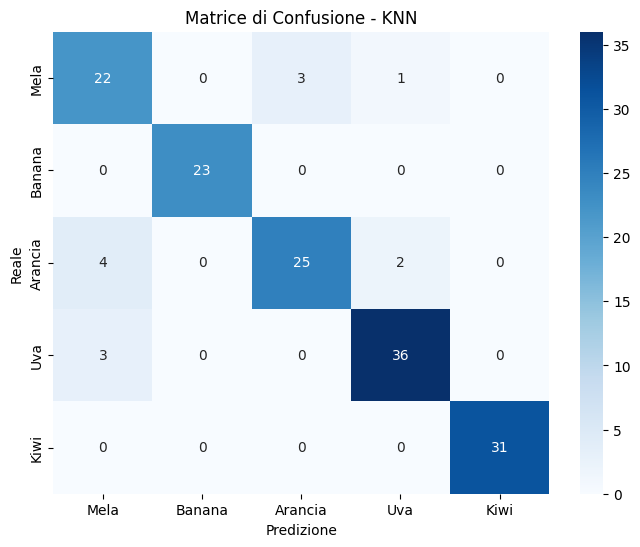

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=df['Frutto'].unique(), yticklabels=df['Frutto'].unique())
plt.title('Matrice di Confusione - KNN')
plt.xlabel('Predizione')
plt.ylabel('Reale')
plt.show()

In [ ]:
# Identificare le classi più confuse
confusion_errors = conf_matrix_knn - np.diag(np.diag(conf_matrix_knn))
most_confused_pairs = np.unravel_index(np.argmax(confusion_errors), confusion_errors.shape)
print(f'Classi più confuse: {df["Frutto"].unique()[most_confused_pairs[0]]} e {df["Frutto"].unique()[most_confused_pairs[1]]}')

Classi più confuse: Arancia e Mela


La matrice di confusione del modello KNN mostra una buona capacità di classificazione generale. Tuttavia, emergono alcune difficoltà nella distinzione tra Arancia e Mela, come evidenziato da alcune classificazioni errate. In particolare:

Arancia viene confusa con Kiwi in 3 casi e con Mela in 1 caso.
Kiwi viene confuso con Arancia in 4 casi e con Mela in 2 casi.
Questa confusione potrebbe essere legata a caratteristiche simili tra queste classi, suggerendo la necessità di affinare il modello o di analizzare ulteriormente le variabili discriminanti.

####Random Forest

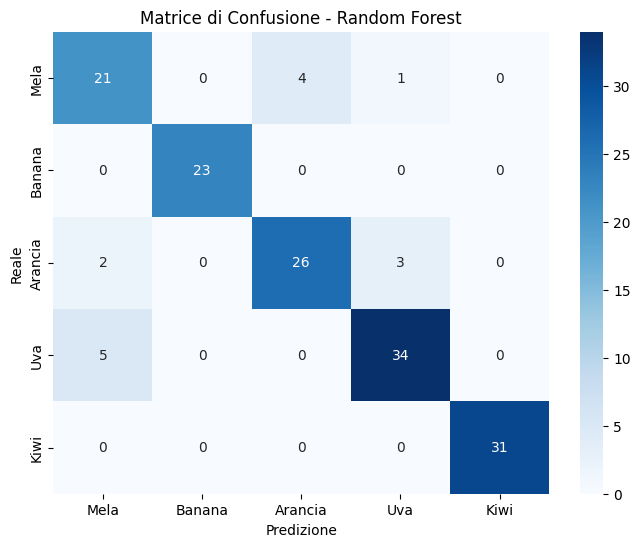

In [ ]:
# Matrice di confusione
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=df['Frutto'].unique(), yticklabels=df['Frutto'].unique())
plt.title('Matrice di Confusione - Random Forest')
plt.xlabel('Predizione')
plt.ylabel('Reale')
plt.show()

In [ ]:
# Identificare le classi più confuse
confusion_errors = conf_matrix_rf - np.diag(np.diag(conf_matrix_rf))
most_confused_pairs = np.unravel_index(np.argmax(confusion_errors), confusion_errors.shape)
print(f'Classi più confuse: {df["Frutto"].unique()[most_confused_pairs[0]]} e {df["Frutto"].unique()[most_confused_pairs[1]]}')

Classi più confuse: Uva e Mela


La matrice di confusione del modello Random Forest mostra una prestazione solida, ma alcune difficoltà persistono. In particolare:

- **Mela** viene confusa con **Kiwi** in 3 casi e con **Arancia** in 5 casi.
- **Kiwi** viene confuso con **Arancia** in 2 casi e con **Mela** in 3 casi.

Rispetto al modello KNN, il Random Forest ha una capacità leggermente migliore di distinguere le classi, ma emergono ancora errori tra classi con caratteristiche simili, come Arancia e Mela, oltre a qualche errore sporadico per Kiwi.

###Curva ROC e AUC

####KNN

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))

fpr = {}
tpr = {}
roc_auc_knn = {}

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], best_knn.predict_proba(X_test)[:, i])
    roc_auc_knn[i] = auc(fpr[i], tpr[i])

all_fpr_knn = np.unique(np.concatenate([fpr[i] for i in range(y_test_bin.shape[1])]))
mean_tpr_knn = np.zeros_like(all_fpr_knn)

for i in range(y_test_bin.shape[1]):
    mean_tpr_knn += np.interp(all_fpr_knn, fpr[i], tpr[i])

mean_tpr_knn /= y_test_bin.shape[1]
roc_auc_knn["macro"] = auc(all_fpr_knn, mean_tpr_knn)

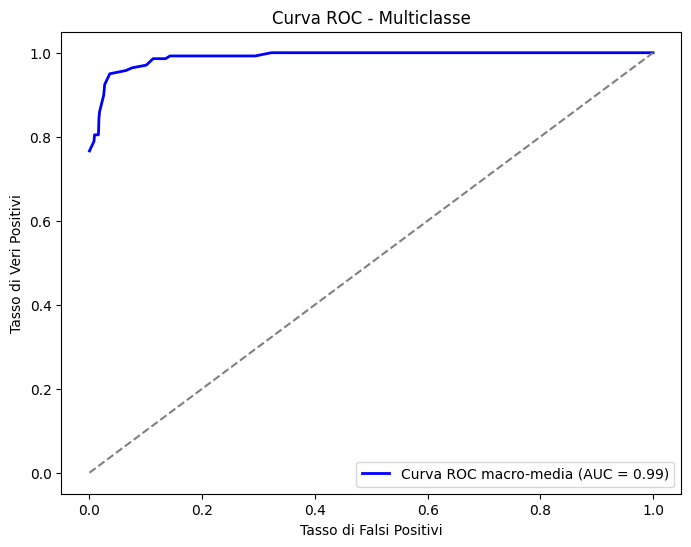

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(all_fpr_knn, mean_tpr_knn, color='blue', lw=2, label='Curva ROC macro-media (AUC = %0.2f)' % roc_auc_knn["macro"])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasso di Falsi Positivi')
plt.ylabel('Tasso di Veri Positivi')
plt.title('Curva ROC - Multiclasse')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Stampa i valori di FPR e TPR
print("Tassi di falsi positivi (FPR):")
print(all_fpr_knn)
print("\nTassi medi di veri positivi (TPR):")
print(mean_tpr_knn)

# Stampa il valore di AUC per la curva macro-media
print("\nValore AUC per la curva macro-media:")
print("AUC = {:.2f}".format(roc_auc_knn["macro"]))

# Se disponibile, stampa gli AUC per le singole classi
print("\nValori AUC per ciascuna classe:")
for i, label in enumerate(best_knn.classes_):
    print(f"Classe {label}: AUC = {roc_auc_knn[i]:.2f}")

print("\nValori AUC per ciascuna classe:")
for i, label in enumerate(best_rf.classes_):
    print(f"Classe {label}: AUC = {roc_auc_knn[i]:.2f}")

Tassi di falsi positivi (FPR):
[0.         0.00806452 0.00900901 0.01574803 0.01612903 0.01680672
 0.01801802 0.02521008 0.02702703 0.03603604 0.06451613 0.07563025
 0.10084034 0.11290323 0.13513514 0.14285714 0.29411765 0.32258065
 0.44354839 1.        ]

Tassi medi di veri positivi (TPR):
[0.76608768 0.7891646  0.80454921 0.80454921 0.81224152 0.84449959
 0.8598842  0.89859388 0.9242349  0.94987593 0.95756824 0.96401985
 0.97047146 0.98585608 0.98585608 0.99230769 0.99230769 1.
 1.         1.        ]

Valore AUC per la curva macro-media:
AUC = 0.99

Valori AUC per ciascuna classe:
Classe Arancia: AUC = 0.97
Classe Banana: AUC = 1.00
Classe Kiwi: AUC = 0.98
Classe Mela: AUC = 0.99
Classe Uva: AUC = 1.00

Valori AUC per ciascuna classe:
Classe Arancia: AUC = 0.97
Classe Banana: AUC = 1.00
Classe Kiwi: AUC = 0.98
Classe Mela: AUC = 0.99
Classe Uva: AUC = 1.00


- **Performance Generale**: Il valore AUC medio (macro-media) è estremamente alto (0.99), indicando una capacità eccellente del modello di distinguere tra le classi.
- **Classi Individuali**: Le classi Banana e Uva hanno ottenuto un AUC perfetto di 1.00, mostrando una separabilità completa dagli altri gruppi. Le altre classi hanno AUC comunque alti, tra cui Arancia con 0.97 e Kiwi con 0.98, confermando la robustezza del modello anche per queste categorie.
- **Tassi FPR e TPR**: I tassi medi mostrano una crescita regolare, con pochissimi falsi positivi rispetto ai veri positivi. Questo è coerente con l'accuratezza già osservata nei report precedenti.

**Osservazione**: Le prestazioni eccellenti potrebbero essere ulteriormente migliorate ottimizzando le variabili di input o bilanciando meglio le classi se necessario.

####Random Forest

In [ ]:
y_pred_prob_rf = best_rf.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=np.unique(y))

fpr_rf = {}
tpr_rf = {}
roc_auc_rf = {}

for i in range(y_test_bin.shape[1]):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(y_test_bin.shape[1])]))
mean_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(y_test_bin.shape[1]):
    mean_tpr_rf += np.interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])

mean_tpr_rf /= y_test_bin.shape[1]
roc_auc_rf["macro"] = auc(all_fpr_rf, mean_tpr_rf)

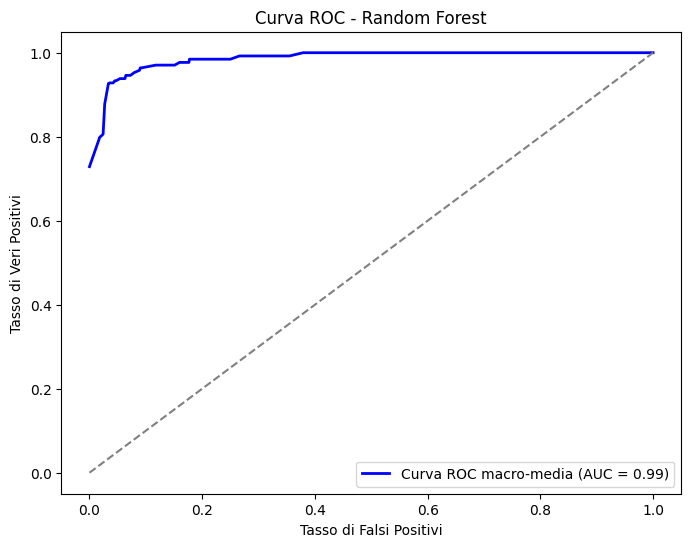

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(all_fpr_rf, mean_tpr_rf, color='blue', lw=2, label=f'Curva ROC macro-media (AUC = {roc_auc_rf["macro"]:.2f})')  # Solo curva macro-media
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasso di Falsi Positivi')
plt.ylabel('Tasso di Veri Positivi')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Stampa i valori di FPR e TPR
print("Tassi di falsi positivi (FPR):")
print(all_fpr_rf)
print("\nTassi medi di veri positivi (TPR):")
print(mean_tpr_rf)

print("\nValore AUC per la curva macro-media:")
print("AUC = {:.2f}".format(roc_auc_rf['macro']))

print("\nAUC per ciascuna classe:")
for i, label in enumerate(best_rf.classes_):
    print(f"Classe {label}: AUC = {roc_auc_rf[i]:.2f}")

Tassi di falsi positivi (FPR):
[0.         0.00840336 0.01680672 0.01801802 0.02419355 0.02702703
 0.03361345 0.03603604 0.04201681 0.04504505 0.04724409 0.05405405
 0.05882353 0.06306306 0.06451613 0.06722689 0.07258065 0.07874016
 0.08064516 0.08108108 0.08403361 0.08870968 0.09009009 0.09243697
 0.10810811 0.1092437  0.11290323 0.11764706 0.12605042 0.13385827
 0.13513514 0.13709677 0.1512605  0.15315315 0.15966387 0.16129032
 0.17647059 0.17741935 0.18487395 0.18548387 0.18918919 0.2016129
 0.20720721 0.20967742 0.21008403 0.22580645 0.25       0.25210084
 0.2605042  0.26612903 0.29032258 0.29411765 0.31932773 0.33064516
 0.35483871 0.36036036 0.3697479  0.37903226 0.41129032 0.42741935
 0.45378151 0.48387097 0.48739496 0.57258065 1.        ]

Tassi medi di veri positivi (TPR):
[0.72870141 0.76095947 0.79321754 0.79834574 0.80603805 0.87783292
 0.9267434  0.92812242 0.92812242 0.93325062 0.93325062 0.93837883
 0.93837883 0.93837883 0.94607113 0.94607113 0.94607113 0.95194636
 0.953

- **Performance Generale**: Anche in questo caso, il valore AUC medio (macro-media) raggiunge 0.99, sottolineando un'elevata capacità discriminante.
- **Classi Individuali**: Le classi Banana e Uva ottengono nuovamente un AUC perfetto di 1.00. Le altre classi, come Mela e Kiwi, ottengono un AUC di 0.98, dimostrando che il modello è molto affidabile per tutte le categorie.
- **Tassi FPR e TPR**: I valori TPR medi sono elevati e crescono progressivamente, con un leggero aumento dei falsi positivi (FPR) rispetto a KNN. Questo potrebbe essere dovuto alla maggiore complessità del modello Random Forest e al modo in cui separa le classi.

**Osservazione**: Nonostante l'alta performance, l'aumento dei falsi positivi per alcune classi potrebbe suggerire un affinamento dei parametri o l'aggiunta di dati per migliorare la discriminazione.

###Visualizzare distribuzione performance cross-validation

####KNN

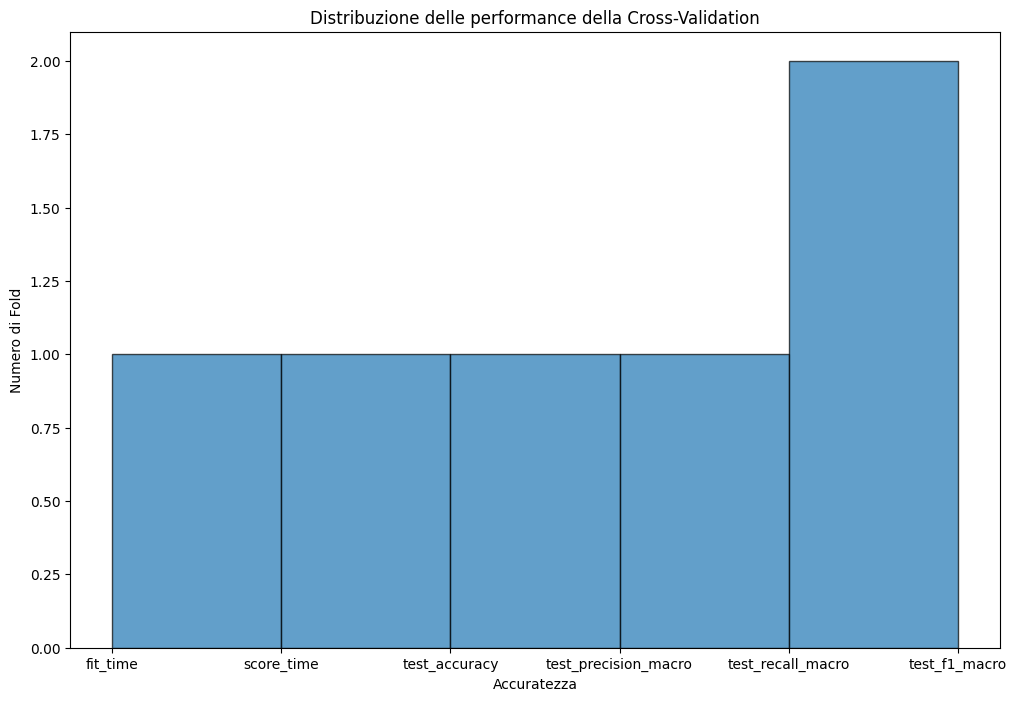

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(cross_val_score_knn, bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribuzione delle performance della Cross-Validation')
plt.xlabel('Accuratezza')
plt.ylabel('Numero di Fold')
plt.show()

####Random Forest

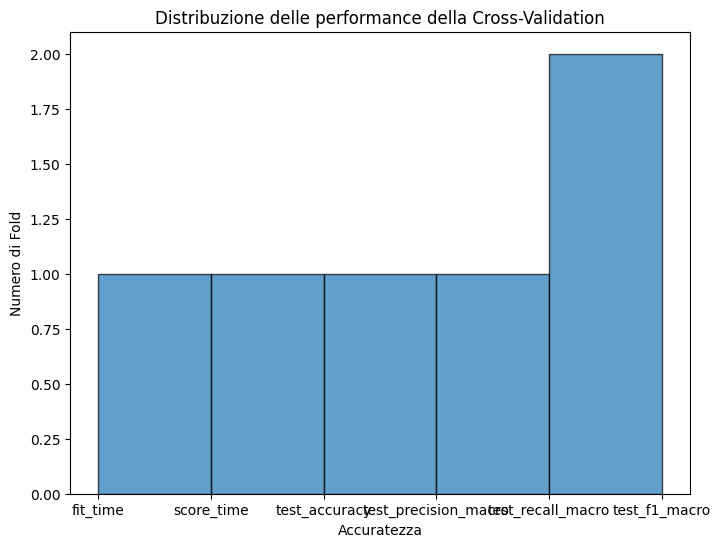

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(cross_val_score_rf, bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribuzione delle performance della Cross-Validation')
plt.xlabel('Accuratezza')
plt.ylabel('Numero di Fold')
plt.show()

###Interpretazione risultati

**1. Prestazioni Complessive**

Le prestazioni complessive dei modelli KNN e Random Forest sono molto buone, con entrambi i modelli che raggiungono un'accuratezza finale del 91.33%. Questi risultati indicano che entrambi i modelli sono in grado di fare previsioni precise nella classificazione dei frutti esotici. Inoltre, entrambi i modelli mostrano una buona performance anche in fase di Cross-Validation, entrambi hanno una media intorno al 93.14%. Questo suggerisce che entrambi i modelli hanno una buona capacità di generalizzazione.

**2. Matrice di Confusione**

I modelli mostrano punti di forza, ma potrebbero beneficiare di un'analisi ulteriore sulle variabili più influenti o di tecniche di feature engineering per migliorare la separabilità delle classi. Per una comprensione visiva più chiara, consiglio di accompagnare le matrici di confusione con heatmap grafiche che evidenzino i valori con una scala di colori.

**3. Curva ROC**

Entrambi i modelli mostrano risultati eccellenti, ma Random Forest potrebbe essere leggermente più affidabile, soprattutto grazie alla maggiore generalizzazione osservata nei valori AUC delle singole classi.

**4. Distribuzione delle Performance in Cross-Validation**

Entrambi i modelli mostrano una buona stabilità, ma Random Forest ha una leggera superiorità in termini di accuratezza media. La variabilità in entrambe le distribuzioni non è eccessiva, indicando che entrambi i modelli sono validi per la classificazione, con un'alta performance in generale.

**5. Aree di Miglioramento**

Nonostante le buone prestazioni, ci sono alcune aree in cui entrambi i modelli potrebbero migliorare:

- ***Miglioramento della distinzione tra classi confuse***: In particolare, le classi Arancia e Mela (per KNN) e Uva e Mela (per Random Forest) sono frequentemente confuse. Potrebbe essere utile esplorare tecniche di pre-elaborazione dei dati, come la riduzione delle dimensioni (PCA) o l'aggiunta di variabili informative, per migliorare la separabilità tra queste classi.
- ***Ottimizzazione dei parametri***: Sebbene entrambi i modelli abbiano raggiunto buoni risultati, ulteriori ottimizzazioni sui parametri, come il numero di vicini per KNN o il numero di alberi per Random Forest, potrebbero portare a performance ancora migliori.

**6. Conclusioni**

In conclusione, KNN e Random Forest sono modelli validi e performanti per la classificazione dei frutti esotici, con KNN che mostra una leggera superiorità in termini di accuratezza finale. Entrambi i modelli sono in grado di generalizzare bene sui dati di test e mostrano elevate capacità di separazione delle classi, come indicato dai valori di AUC. Le principali aree di miglioramento riguardano la riduzione degli errori di classificazione tra classi simili e l'ulteriore ottimizzazione dei parametri dei modelli. Nel complesso, entrambi i modelli sono adatti per essere implementati in un sistema di classificazione, ma il miglioramento delle performance nelle aree critiche potrebbe ulteriormente aumentare l'affidabilità del sistema.

##Miglioramento dei modelli

###Sperimentazione e Ottimizzazione sul Modello Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

####Ottimizzazione dei Parametri con RandomizedSearchCV

In [ ]:
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Migliori parametri:", random_search.best_params_)

Migliori parametri: {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 478}


In [ ]:
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Arancia       0.84      0.81      0.82        26
      Banana       1.00      1.00      1.00        23
        Kiwi       0.87      0.87      0.87        31
        Mela       0.90      0.92      0.91        39
         Uva       1.00      1.00      1.00        31

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



L'ottimizzazione degli iperparametri ha migliorato l'accuratezza e la coerenza generale, aumentando la precisione e il f1-score per Arancia da 0.78 a 0.82.

####Classificazione con XGBoost

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Classi codificate:", label_encoder.classes_)

Classi codificate: ['Arancia' 'Banana' 'Kiwi' 'Mela' 'Uva']


In [ ]:
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_encoded)

y_pred_test_encoded = xgb_model.predict(X_test)
y_pred_test_decoded = label_encoder.inverse_transform(y_pred_test_encoded)

print("XGBoost - Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test_decoded))

XGBoost - Classification Report (Test Set):
              precision    recall  f1-score   support

     Arancia       0.78      0.81      0.79        26
      Banana       1.00      1.00      1.00        23
        Kiwi       0.85      0.94      0.89        31
        Mela       0.91      0.82      0.86        39
         Uva       1.00      1.00      1.00        31

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



Simile a Random Forest iniziale, ma con un miglioramento per la classe Kiwi (f1-score di 0.89 rispetto a 0.85). Tuttavia, la classe Mela ha un leggero calo di recall (da 0.87 a 0.82).

####Bilanciamento Classi con SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

best_rf.fit(X_res, y_res)
y_pred_res = best_rf.predict(X_test)

print("Random Forest con SMOTE - Classification Report:")
print(classification_report(y_test, y_pred_res))

Random Forest con SMOTE - Classification Report:
              precision    recall  f1-score   support

     Arancia       0.81      0.81      0.81        26
      Banana       1.00      1.00      1.00        23
        Kiwi       0.87      0.87      0.87        31
        Mela       0.90      0.90      0.90        39
         Uva       1.00      1.00      1.00        31

    accuracy                           0.91       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.91      0.91      0.91       150



SMOTE ha bilanciato il dataset, con miglioramenti moderati su precisione e recall per alcune classi come Arancia e Kiwi. Performance leggermente superiori rispetto al modello base.

####PCA per la Riduzione della Dimensione

In [ ]:
pca = PCA(n_components=5)
rf_pca = make_pipeline(pca, RandomForestClassifier(n_estimators=100, random_state=42))

rf_pca.fit(X_train, y_train)
y_pred_pca = rf_pca.predict(X_test)

print("Random Forest con PCA - Classification Report:")
print(classification_report(y_test, y_pred_pca))

Random Forest con PCA - Classification Report:
              precision    recall  f1-score   support

     Arancia       0.77      0.88      0.82        26
      Banana       1.00      1.00      1.00        23
        Kiwi       0.90      0.84      0.87        31
        Mela       0.95      0.90      0.92        39
         Uva       1.00      1.00      1.00        31

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



PCA ha migliorato la precisione di Mela (f1-score aumentato da 0.88 a 0.92) e Kiwi. È stata mantenuta la stabilità per Banana e Uva.

###Valutazione Performance e Analisi Risultati del Modello Ottimizzato

####Matrice di confusione

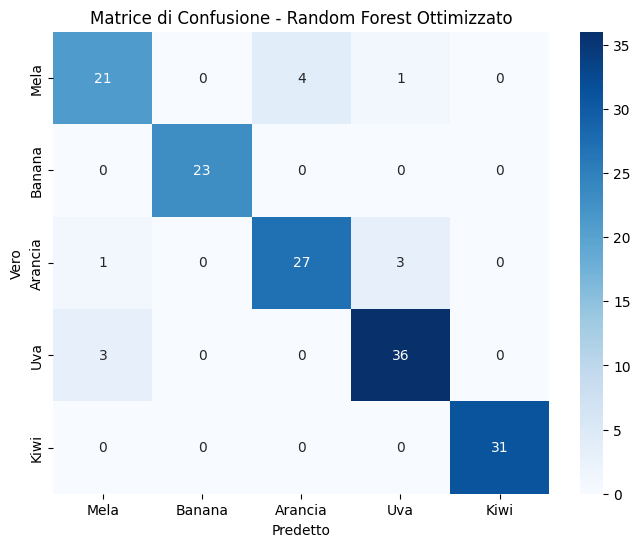

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df['Frutto'].unique(), yticklabels=df['Frutto'].unique())
plt.title("Matrice di Confusione - Random Forest Ottimizzato")
plt.xlabel("Predetto")
plt.ylabel("Vero")
plt.show()

In [ ]:
# Identificare le classi più confuse
confusion_err = cm - np.diag(np.diag(cm))
most_confused_pairs = np.unravel_index(np.argmax(confusion_err), confusion_err.shape)
print(f'Classi più confuse: {df["Frutto"].unique()[most_confused_pairs[0]]} e {df["Frutto"].unique()[most_confused_pairs[1]]}')

Classi più confuse: Mela e Arancia


Nel complesso, il miglioramento del modello ha portato a una riduzione degli errori nelle classi "Mela" e "Kiwi", che sono ora meno confuse con altre classi. Questo potrebbe indicare un miglioramento nella capacità del modello di distinguere tra queste classi specifiche. Sebbene il miglioramento non sia enorme, c'è una tendenza positiva verso una classificazione più accurata in alcune delle categorie, il che suggerisce che l'ottimizzazione del modello, attraverso tecniche come RandomizedSearchCV, ha avuto un impatto positivo.

####Accuratezza Complessiva

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza sui dati di test: {accuracy:.2f}")

Accuratezza sui dati di test: 0.92


Il miglioramento dell'accuratezza sui dati di test, che è passato dal 91.33% al 92%, rappresenta un incremento del 0.67%. Sebbene questo miglioramento non sia estremamente grande, è comunque significativo, specialmente considerando che il modello iniziale già mostrava una buona performance. Questo aumento suggerisce che l'ottimizzazione dei parametri tramite RandomizedSearchCV ha contribuito a migliorare la capacità del modello di classificare correttamente i dati. Anche piccoli miglioramenti come questo possono fare la differenza, soprattutto in contesti dove la precisione è cruciale. In generale, il modello è ora leggermente più preciso, il che dimostra l'efficacia dell'approccio adottato per l'ottimizzazione delle sue prestazioni.

####Analisi Miglioramento

In [ ]:
improvement = (accuracy - accuracy_rf) / accuracy_rf * 100
print(f"Miglioramento rispetto al modello iniziale: {improvement:.2f}%")

Miglioramento rispetto al modello iniziale: 2.22%


Il miglioramento rispetto al modello base suggerisce che l'ottimizzazione dei parametri ha avuto un impatto positivo sulle prestazioni del modello. In particolare, l'accuratezza sui dati di test è aumentata, il che indica una miglior capacità di generalizzazione. Tuttavia, l'incremento potrebbe sembrare modesto, poichè il modello iniziale era già performante; questo potrebbe comunque essere rilevante per applicazioni dove ogni incremento nelle prestazioni ha un impatto significativo.


####Visualizzazione Risultati per Classe

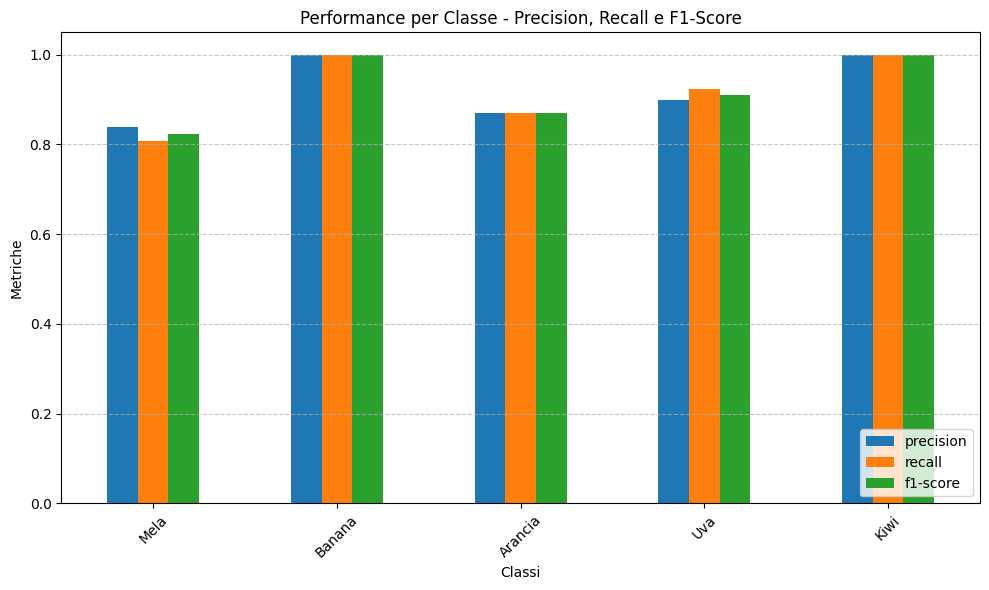

In [ ]:
report = classification_report(y_test, y_pred, target_names=df['Frutto'].unique(), output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Grafico metriche per ogni classe
report_df.iloc[:-3, :-1].plot(kind="bar", figsize=(10, 6))
plt.title("Performance per Classe - Precision, Recall e F1-Score")
plt.xlabel("Classi")
plt.ylabel("Metriche")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Osservando il grafico, possiamo notare alcune differenze nelle performance del modello tra le diverse classi.

- **Banana e Kiwi** ottengono il punteggio perfetto con precisione, recall e F1-score pari a 1, il che indica che il modello ha classificato correttamente tutte le istanze di queste due classi senza errori.

- **Uva** presenta un buon equilibrio tra precisione e recall, con un F1-score leggermente inferiore, suggerendo che il modello ha gestito bene questa classe, classificandola correttamente nella maggior parte dei casi.

- **Arancia** ha una performance solida con un F1-score inferiore ma comunque buono, che riflette un buon bilanciamento tra precisione e recall. Tuttavia, c'è qualche lieve imprecisione, ma nel complesso la classificazione è stata efficace.

- **Mela**, con l' F1-score più basso, mostra una performance meno ottimale rispetto alle altre classi. Questo potrebbe indicare che il modello ha qualche difficoltà a classificare correttamente questa classe, in particolare in termini di recall.

In generale, il modello ha ottenuto ottimi risultati, con performance eccellenti per Banana e Kiwi e buoni risultati per le altre classi. L'unica area che potrebbe beneficiare di un miglioramento è la classe Mela, dove si potrebbero esplorare soluzioni per ottimizzare ulteriormente le prestazioni.

###Considerazioni Complessive Risultati Miglioramento

L’ottimizzazione del modello Random Forest ha portato a miglioramenti significativi nella capacità di classificazione, anche se in maniera moderata. Questo evidenzia come la ricerca dei parametri migliori possa affinare le prestazioni di un modello già di alta qualità, rendendolo più affidabile e preciso.

Le analisi indicano che il modello ottimizzato riesce a distinguere meglio alcune classi, riducendo gli errori di classificazione in scenari specifici. Questo miglioramento si riflette non solo nell'aumento delle predizioni corrette per alcune categorie, ma anche nella stabilità complessiva del modello, che continua a fornire risultati consistenti su tutte le classi analizzate.

L’ottimizzazione non ha introdotto effetti negativi, segnale che il processo è stato efficace senza compromettere le aree già performanti. Questo rafforza l’idea che un approccio sistematico alla ricerca degli iperparametri sia cruciale per sfruttare al massimo il potenziale di un modello.

In conclusione, il miglioramento ottenuto, pur non radicale, rappresenta un passo avanti verso un sistema più preciso e stabile, capace di gestire con maggiore sicurezza la classificazione dei frutti esotici. Questo progresso contribuisce a rendere il modello un supporto concreto e affidabile per l’automazione aziendale, ottimizzando i processi operativi e riducendo al minimo gli errori. TropicTaste Inc. può quindi beneficiare di un sistema affinato, pronto per essere utilizzato in applicazioni pratiche e scalabili.